# Modeling exercise

In [6]:
import pandas as pd
import numpy as np
import plotly_express as px
import ipywidgets as widgets

In [7]:
import seaborn as sns

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [15]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the training set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Analysing the expermient results

1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it? 
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes. 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results? 

Bonus:

* For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned. 
  * Hint: Use a grid. See classification models notebook 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

In [2]:
# slope, intercept = 2.5, 6

In [24]:
# x_1, x_2 = 0.2, 0.6
# on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

# above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
#               [x_2, x_2*slope + intercept + 2, 'Above']] 

# below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
#               [x_2, x_2*slope + intercept - 2, 'Below']] 

In [25]:
# columns = ['x','y','label']
# data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

In [10]:
# px.scatter(data, x='x', y='y', color = 'label')

## Fitting and Overfiting 

## Moons dataset

In [11]:
from sklearn.datasets import make_moons

In [12]:
# points, label = make_moons(n_samples=10, noise=0.7)
# moons_df = pd.DataFrame(points, columns=['x','y'])
# moons_df['label'] = label
# moons_df.label = moons_df.label.map({0:'A', 1:'B'})
# moons_df.head()

In [13]:
# px.scatter(moons_df, x='x', y='y', color = 'label')

In [55]:
# @widgets.interact
# def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
#     points, label = make_moons(n_samples=1000, noise=noise_level)
#     moons_df = pd.DataFrame(points, columns=['x','y'])
#     moons_df['label'] = label
#     moons_df.label = moons_df.label.map({0:'A', 1:'B'})
#     return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

In [ ]:
# Logistic regresssion 

In [36]:
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression(penalty='l2', C=2.0)
# log_reg.fit(moons_df[['x','y']], moons_df['label'])

LogisticRegression(C=2.0)

In [37]:
# # Retrieve the model parameters.
# b = log_reg.intercept_[0]
# w1, w2 = log_reg.coef_[0]

# # Calculate the intercept and gradient of the decision boundary.
# c = -b/w2
# m = -w1/w2

In [38]:
# moons_df['predicted_class'] = log_reg.predict(moons_df[['x','y']])
# moons_df[['prob_A','prob_B']] = log_reg.predict_proba(moons_df[['x','y']])
# moons_df['log_regression_value'] = moons_df.x.apply(lambda x: m*x + c)

In [39]:
# accuracy = moons_df[moons_df.label==moons_df.predicted_class].shape[0]/moons_df.shape[0]
# accuracy

0.9

In [19]:
#Notes for myself :
# my random split isn't too much good since it uses a random test train split- Hence each point can come more than once in each fold
# In Oren's code he uses K-fold which ensures a split without repitition. 
# After applying k-fold its better to save each K data and then run aggregarions ( instead doing AVG of accuracy) 

In [ ]:
# SVM

In [9]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

In [204]:
# n_s=1000
# noise=0.25

In [135]:
# points, label = make_moons(n_samples=n_s, noise=noise)
# moons_df = pd.DataFrame(points, columns=['x','y'])
# moons_df['label'] = label
# moons_df.label = moons_df.label.map({0:'A', 1:'B'})

In [251]:
# n_s=[10,1000]
# noise=[0.25,0.5]
# for n in noise:
#     print(n)


0.25
0.5


In [16]:
# # Yarden Answer - OLD
# datasets=['moons','circles']
# regulation_method = 'l2'
# #n_s=[50,100,1000,10000]
# n_s=[50,100,1000] 
# #noise=[0,0.1,0.2,0.3,0.4,0.5]
# noise=[0.2,0.3]
# C_range =  [0.001, 0.01, 0.1, 0.5,1,10,100] 
# #gamma_range = [1e-8,1e-6,1e-4,1e-3,1e-1, 1,2,6,10,100]
# gamma_range = [0.001,0.005,0.01,0.05,0.1,0.5,5,10,50]
# models=['svm','logistic_regression']
# k_folds = 10
# classifiers = []
# for size in n_s:
#     for n in noise:
#         for i in datasets:
#             if i=='moons':
#                     points, label = make_moons(n_samples=size, noise=n)
#                     moons_df = pd.DataFrame(points, columns=['x','y'])
#                     moons_df['label'] = label
#                     moons_df.label = moons_df.label.map({0:'A', 1:'B'})
#             if i=='circles':
#                     points, label = make_circles(n_samples=size, noise=n)
#                     moons_df = pd.DataFrame(points, columns=['x','y'])
#                     moons_df['label'] = label
#                     moons_df.label = moons_df.label.map({0:'A', 1:'B'})
#             for k in range(k_folds):
#                 x_train,x_test,y_train,y_test=train_test_split(moons_df[['x','y']],moons_df['label'],test_size=0.3,random_state=k)
#                 for model in models:
#                     if model=='svm':
#                         for gamma in gamma_range:
#                             clf = SVC(gamma=gamma)
#                             clf.fit(x_train, y_train)
#                             y_test_pred = clf.predict(x_test)
#                             y_train_pred=clf.predict(x_train)
#                             classifiers.append((model,size,n,i, gamma, k_folds,k, accuracy_score(y_test, y_test_pred),accuracy_score(y_train,y_train_pred)))
#                     if model=='logistic_regression':
#                         for C in C_range:
#                             log_reg = LogisticRegression(penalty=regulation_method, C=C)
#                             log_reg.fit(x_train,y_train)
#                             y_test_pred=log_reg.predict(x_test)
#                             y_train_pred=log_reg.predict(x_train)
#                             # X = moons_df.iloc[:,:-1] #without label
#                             # y = moons_df.iloc[:,-1]  #only label
#                             # cv_results = cross_validate(log_reg, X, y, cv = kf, return_train_score=True)
#                             # TRE = sum(cv_results['train_score'])/k_folds
#                             # TESTE = sum(cv_results['test_score'])/k_folds
#                             classifiers.append((model,size,n,i, C, k_folds,k, accuracy_score(y_test, y_test_pred),accuracy_score(y_train,y_train_pred)))

In [18]:
# results = pd.DataFrame(classifiers, columns = ['model','size','noise','data','regularization','k_folds','k','acc_test','acc_train'])
# results

In [19]:
# results = pd.DataFrame(classifiers, columns = ['model','size','noise','data','regularization','k_folds','k','acc_test','acc_train'])

# results=results.groupby(['model','regularization','k_folds','size','noise','data']).agg(['mean','std'])[['acc_test','acc_train']]
# #results_2=results.groupby(['model','regularization','k_folds','size','noise','data']).agg(['std'])[['acc_test','acc_train']]
# t=results.pivot_table(values = ['acc_test','acc_train'], index=['model','k_folds','size','noise','data'], columns='regularization')

In [20]:
# acc_test=t['acc_train'].stack()
# acc_test=acc_test.rename(columns={'mean': 'TRE','std':'TRE_STD'}).reset_index()

# #accstd_test=z['acc_test']

# acc_train=t['acc_test'].stack()
# acc_train=acc_train.rename(columns={'mean': 'TESTE','std':'TESTE_STD'}).reset_index()





In [16]:
# almost_final=acc_test.merge(acc_train, how='inner', on = ['model','k_folds','size','noise','data','regularization'])
# almost_final['E_DIFF']=almost_final['TESTE']-almost_final['TRE']
# almost_final['E_STD_DIFF']=almost_final['TESTE_STD']-almost_final['TRE_STD']

In [24]:
# from IPython.display import display, clear_output

# for j in almost_final['model'].unique():  
#     for i in almost_final['size'].unique(): 
#         for k in almost_final['noise'].unique():
#                 for t in almost_final['data'].unique():
#                     ds_data = almost_final[(almost_final.model==j) & (almost_final.data==t) & (almost_final['noise']==k)  &(almost_final['size']==i)   ]
#                     fig = px.line(ds_data, x='regularization', y=['TRE', 'TESTE'])
#                     fig.update_layout(title_text=f'Test Accuracy by {ds_data.model.unique()[0]} Hyperparamter - Dataset: {ds_data.data.unique()[0]} , noise ={k}, size=  {i}, model={j}')
#                     fig.update_yaxes(title_text='Accuracy', secondary_y=False)
#                     fig.show()

In [ ]:
#almost_final.to_csv(r'C:\Users\yarden.ayalon\python_ml\Python_ML-2022 - New version\Final project\model_vars.csv')

In [ ]:
datasets=['moons','circles']
regulation_method = 'l2'
#n_s=[50,100,1000,10000]
n_s=[50,100,1000] 
#noise=[0,0.1,0.2,0.3,0.4,0.5]
noise=[0.2,0.3]
C_range =  [0.001, 0.01, 0.1, 0.5,1,10,100] 
#gamma_range = [1e-8,1e-6,1e-4,1e-3,1e-1, 1,2,6,10,100]
gamma_range = [0.001,0.005,0.01,0.05,0.1,0.5,5,10,50]

Another  Method - The differance is how i split to train and test - > Using the build in cross_validate ensure that each fold will be unique. For sake of better analysis in he future it might be smarter to save each fold's data and then run an aggregation, rather than aggregating already in the in the loop

In [ ]:
#Importing required libraries
from sklearn.datasets import make_moons, make_circles
#from src.modeling_util import creat_dataset, accuracy
from sklearn import svm
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import statistics

In [ ]:
rdata_lst = []

In [25]:
C_range =  [0.001, 0.01, 0.1, 0.5,1,10,100] 
Gamma_range = [0.001,0.005,0.01,0.05,0.1,0.5,5,10,50]
n_samples = [5, 10, 50, 100,1000,10000]
noise_lvl = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

regulation_method = 'l2'
svm_kernel = 'rbf'
k_folds = 10 
classifiers = ['logistic', 'svm']
data_types = ['circles', 'moons']
#constants
train_test_por = 0.2
rndm_seed = 42
#loop util vars
iter_count = 0
rdata_lst = []
#looping
for n in n_samples:
    for nl in noise_lvl:
        for i in data_types:
            if i=='moons':
                    points, label = make_moons(n_samples=n, noise=nl)
                    df = pd.DataFrame(points, columns=['x','y'])
                    df['label'] = label
                    df.label = df.label.map({0:'A', 1:'B'})
            if i=='circles':
                    points, label = make_circles(n_samples=n, noise=nl)
                    df = pd.DataFrame(points, columns=['x','y'])
                    df['label'] = label
                    df.label = df.label.map({0:'A', 1:'B'})      
            print(f'Cross validation for {i} dataset with {n} samples and noise level {nl}')
            if n < k_folds:           #is num of samples smaller than k_fold use n
                kf = KFold(n_splits=n)
            else:
                kf = KFold(n_splits=k_folds)           #no shuffling 
            
            acc_score = []         #to keep a list of all cross val scores
            for clf_type in classifiers:
               
                if clf_type == 'svm':
                    for Gamma in Gamma_range:
                        svm_clf = svm.SVC(kernel=svm_kernel, gamma=Gamma)
                        X = df.iloc[:,:-1] #without label
                        y = df.iloc[:,-1]  #only label
                        cv_results = cross_validate(svm_clf, X, y, cv = kf, return_train_score=True)
                        TRE = sum(cv_results['train_score'])/k_folds
                        TRE_STD = statistics.pstdev(cv_results['train_score'])
                        #obtain test scores
                        TESTE = sum(cv_results['test_score'])/k_folds
                        TESTE_STD = statistics.pstdev(cv_results['test_score'])
                        E_DIFF = TRE - TESTE
                        iter_dic = {}
                        iter_dic.update({"n": n, "noise_lvl": nl, "data_type": i, "model": clf_type,
                                         "TRE": TRE, "TRE_STD": TRE_STD, "TESTE": TESTE,
                                         "TESTE_STD": TESTE_STD, "E_DIFF": E_DIFF, "model_param": Gamma})
                                      
                        rdata_lst.append(iter_dic)
                if clf_type == 'logistic':
                    for C in C_range:
                        log_reg = LogisticRegression(penalty=regulation_method, C=C)
                        X = df.iloc[:,:-1] #without label
                        y = df.iloc[:,-1]  #only label
                        cv_results = cross_validate(log_reg, X, y, cv = kf, return_train_score=True)
                        #obtain train scores
                        TRE = sum(cv_results['train_score'])/k_folds
                        TRE_STD = statistics.pstdev(cv_results['train_score'])
                        #obtain test scores
                        TESTE = sum(cv_results['test_score'])/k_folds
                        TESTE_STD = statistics.pstdev(cv_results['test_score'])
                        E_DIFF = TRE - TESTE
                        iter_dic = {}
                        iter_dic.update({"n": n, "noise_lvl": nl, "data_type": i, "model": clf_type,
                                         "TRE": TRE, "TRE_STD": TRE_STD, "TESTE": TESTE,
                                         "TESTE_STD": TESTE_STD, "E_DIFF": E_DIFF, "model_param": C})
                        rdata_lst.append(iter_dic)
                

#results list of dict into a dataframe
rdata_df = pd.DataFrame.from_dict(rdata_lst)
   

Cross validation for circles dataset with 5 samples and noise level 0
Cross validation for moons dataset with 5 samples and noise level 0
Cross validation for circles dataset with 5 samples and noise level 0.1
Cross validation for moons dataset with 5 samples and noise level 0.1
Cross validation for circles dataset with 5 samples and noise level 0.2
Cross validation for moons dataset with 5 samples and noise level 0.2
Cross validation for circles dataset with 5 samples and noise level 0.3
Cross validation for moons dataset with 5 samples and noise level 0.3
Cross validation for circles dataset with 5 samples and noise level 0.4
Cross validation for moons dataset with 5 samples and noise level 0.4
Cross validation for circles dataset with 5 samples and noise level 0.5
Cross validation for moons dataset with 5 samples and noise level 0.5
Cross validation for circles dataset with 10 samples and noise level 0
Cross validation for moons dataset with 10 samples and noise level 0
Cross valida

KeyboardInterrupt: 

In [40]:
rdata_df.to_csv(r'C:\Users\yarden.ayalon\python_ml\Python_ML-2022 - New version\Final project\model_vars.csv')

In [28]:
rdata_df[(rdata_df.model=='logistic') &(rdata_df.noise_lvl==0) & (rdata_df.n==100)].sort_values(by='model_param')

,Unnamed: 0,n,noise_lvl,data_type,model,TRE,TRE_STD,TESTE,TESTE_STD,E_DIFF,model_param
576,576,100,0.0,circles,logistic,0.503444,0.007895,0.436,0.034409,0.067444,0.001
592,592,100,0.0,moons,logistic,0.792667,0.007323,0.784,0.047159,0.008667,0.001
577,577,100,0.0,circles,logistic,0.500222,0.014123,0.424,0.048826,0.076222,0.010
593,593,100,0.0,moons,logistic,0.818111,0.006046,0.814,0.046733,0.004111,0.010
578,578,100,0.0,circles,logistic,0.507889,0.005632,0.425,0.046314,0.082889,0.100
594,594,100,0.0,moons,logistic,0.854889,0.003189,0.854,0.035270,0.000889,0.100
579,579,100,0.0,circles,logistic,0.508111,0.006593,0.425,0.050448,0.083111,0.500
595,595,100,0.0,moons,logistic,0.861000,0.003199,0.858,0.034293,0.003000,0.500
580,580,100,0.0,circles,logistic,0.508222,0.006444,0.425,0.050448,0.083222,1.000
596,596,100,0.0,moons,logistic,0.861222,0.003633,0.862,0.035440,-0.000778,1.000


In [29]:
# from IPython.display import display, clear_output

# for j in rdata_df['model'].unique():  
#     for i in rdata_df['n'].unique(): 
#         for k in rdata_df['noise_lvl'].unique():
#                 for t in rdata_df['data_type'].unique():
#                     ds_data = rdata_df[(rdata_df.model==j) & (rdata_df.data_type==t) & (rdata_df['noise_lvl']==k)  &(rdata_df['n']==i)   ]
#                     fig = px.line(ds_data, x='model_param', y=['TRE', 'TESTE'])
#                     fig.update_layout(title_text=f'Test Accuracy by {ds_data.model.unique()[0]} Hyperparamter - Dataset: {ds_data.data_type.unique()[0]} , noise ={k}, size=  {i}, model={j}')
#                     fig.update_yaxes(title_text='Accuracy', secondary_y=False)
#                     fig.show()

### Analysis  

In [31]:
df=pd.read_csv(r'C:\Users\yarden.ayalon\python_ml\Python_ML-2022 - New version\Final project\model_vars.csv')

,Unnamed: 0,n,noise_lvl,data_type,model,TRE,TRE_STD,TESTE,TESTE_STD,E_DIFF,model_param
0,0,5,0.0,circles,logistic,0.252375,0.008782,0.2340,0.019391,0.018375,0.001
1,1,5,0.0,circles,logistic,0.256750,0.029595,0.2405,0.042942,0.016250,0.010
2,2,5,0.0,circles,logistic,0.256625,0.009104,0.2375,0.046152,0.019125,0.100
3,3,5,0.0,circles,logistic,0.257250,0.011028,0.2400,0.043012,0.017250,0.500
4,4,5,0.0,circles,logistic,0.257250,0.010326,0.2400,0.043012,0.017250,1.000
...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,10000,0.5,moons,svm,0.856889,0.003810,0.8550,0.031064,0.001889,0.100
1148,1148,10000,0.5,moons,svm,0.931778,0.003758,0.9260,0.022000,0.005778,0.500
1149,1149,10000,0.5,moons,svm,0.950111,0.002959,0.9460,0.021071,0.004111,5.000
1150,1150,10000,0.5,moons,svm,0.949889,0.002917,0.9450,0.023345,0.004889,10.000


In [32]:
import ipywidgets as widgets

### Q1
### For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?

In [33]:
@widgets.interact
def show_date_type(data_type=df.data_type.unique()):
    data = df[(df.data_type == data_type) &(df.model == 'svm') &(df.n == 10000)]
    #print(data)
    fig = px.line(data, x='model_param',y='TESTE', color='noise_lvl',hover_data=['TESTE_STD'],template='plotly_white')
    return fig

interactive(children=(Dropdown(description='data_type', options=('circles', 'moons'), value='circles'), Output…

In [37]:
# For circles Data best param is where gamma=50,TESTE = 0.654 ,with noise level of 0.3- STD 0.041 - Even less than without any noise!  
# For moons Data  best param is where gamma=50, TESTE = 0.943 with noise level of 0.5 - STD = 0.022 -> More than without any noise

### Q in this section:
### In circles - > Looking only on gamma = 50, how come no noise has higher STD than no noise ? I think it is because when you have noise in the train set it will be more relevant to any other test set
### In mooon -> Why higher noise give a worse STD ( The opposite of what happened in circles)

### Q2 For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in comparison to other models? Explain using bias and variance terminoligy.

In [42]:
@widgets.interact
def show_date_type(data_type=df.data_type.unique()):
    data = df[(df.data_type == data_type) &(df.model == 'svm') &(df.n == 10000) ]
    #print(data)
    fig = px.line(data, x='model_param',y='TESTE_STD', color='noise_lvl',hover_data=['TESTE'],template='plotly_white')
    return fig

interactive(children=(Dropdown(description='data_type', options=('circles', 'moons'), value='circles'), Output…

In [41]:
# For Cicles Data set the most stable model is with no noise, gamma at its minimal level.STD is 0.0126. Test accuracy is 0.47 ( VS 0.63 for the highest gamma).
# This happens since in lower gammas the model is more conservative- Less accuracte ( high bias) but very consisten( low variance)
# For Moons Data the minimal TESTTE_STD is actually for the highest gamma, with no noise.STD is 0.0137 .
#I belive this is due to the distribution of points of that specific model where. It is interesting to see the STD trend for no noise, between the two data sets:
# As seen in previous answer classification in cicles Data set is much harder- The low gamma might result with a slight better STD but the accuracy is worse than in Moons data set. When the gamma is higher moons data set is a superior in all measures 

In [43]:
###  ??What makes circles act differantly then moons?? - > Why high complexity in moons data set gives lower STD?

### Q3 - Does regularization helps in linear models?
### Does regularization help for linear models? consider different datasets sizes.

In [44]:
@widgets.interact
def show_date_type(noise_lvl=df.noise_lvl.unique(),data_type=df.data_type.unique()):
    data = df[(df.noise_lvl == noise_lvl) &(df.model == 'logistic') &   (df.data_type == data_type) &(df.model_param < 100)]
    fig=px.line(data, x='model_param',y='TESTE', color='n',hover_data=['TESTE'],template='plotly_white')
    return fig

interactive(children=(Dropdown(description='noise_lvl', options=(0.0, 0.1, 0.2, 0.3, 0.4, 0.5), value=0.0), Dr…

In [79]:
### Regularization in the linear model stops improving model's accuracy in one point. Since it is a linear model, and ridge only adjust the slope of that line, at some point it gets to the best slope. 


In [81]:
### ??Why the higher penalty doensn't reduce the model accuracy??  Would expect to see lower STD with time, and then a point when it goes up

### Q4 + 5
### For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
### For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)

In [45]:
@widgets.interact
def show_date_type(model=df.model.unique(),data_type=df.data_type.unique()):
    data = df[(df.noise_lvl == 0.1) &(df.model == model) &   (df.data_type == data_type)  ]
    fig=px.line(data, x='model_param',y=['TRE','TESTE','E_DIFF'], facet_col='n',template='plotly_white')
    return fig

interactive(children=(Dropdown(description='model', options=('logistic', 'svm'), value='logistic'), Dropdown(d…

In [ ]:
### SVM, Moons- With higher n the test and the train errors are getting higher also. but why in bigger n the differance is getting higher also ? Doesn't overfit happens in lower n?
### SVM, circles- Same. Why the overfit have worse affect with larger data sets?

##logistic, Moons -Only when the n is very low (5) there is a difference in test/train scores. With bigger N the measures act pretty much the same. 
##logistic, Circles -Interesting to see that with a n=100 the test-train diff is the highest. 

In [48]:
##Q6
@widgets.interact
def show_date_type(model=df.model.unique(),data_type=df.data_type.unique()):
    data = df[(df.model == model) &   (df.data_type == data_type)    ]
    fig=px.scatter(data, x='model_param',y=['noise_lvl'], color='TESTE',template='plotly_white')
    return fig

interactive(children=(Dropdown(description='model', options=('logistic', 'svm'), value='logistic'), Dropdown(d…

In [53]:
df.groupby(['n','data_type','model','model_param']).TESTE.mean().to_frame().reset_index().sort_values(by=['TESTE'],ascending=False)

,n,data_type,model,model_param,TESTE
94,50,moons,svm,10.0,0.942500
93,50,moons,svm,5.0,0.941500
61,10,moons,svm,5.0,0.938500
95,50,moons,svm,50.0,0.937833
62,10,moons,svm,10.0,0.937667
...,...,...,...,...,...
4,5,circles,logistic,1.0,0.234417
3,5,circles,logistic,0.5,0.234417
2,5,circles,logistic,0.1,0.234333
6,5,circles,logistic,100.0,0.234250


In [54]:
@widgets.interact
def show_date_type(model=q6.model.unique(),data_type=q6.data_type.unique(),model_param=q6.model_param.unique()):
    data = df[(q6.model == model) &   (q6.data_type == data_type) &   (q6.model_param == model_param)  ]
    fig=px.bar(data.sort_values(by=['noise_lvl','TESTE'],ascending=False), x='noise_lvl',y=['TESTE'], color='n',template='plotly_white')
    return fig

interactive(children=(Dropdown(description='model', options=('logistic', 'svm'), value='logistic'), Dropdown(d…

## Circles Dataset

In [56]:
from sklearn.datasets import make_circles

In [57]:
def make_circles_dataframe(n_samples, noise_level):
    points, label = make_circles(n_samples=n_samples, noise=noise_level)
    circles_df = pd.DataFrame(points, columns=['x','y'])
    circles_df['label'] = label
    circles_df.label = circles_df.label.map({0:'A', 1:'B'})
    return circles_df

In [58]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,0.974527,-0.224271,A
1,-0.303823,0.740062,B
2,0.823533,-0.567269,A
3,0.779621,0.179417,B
4,0.260842,0.965382,A


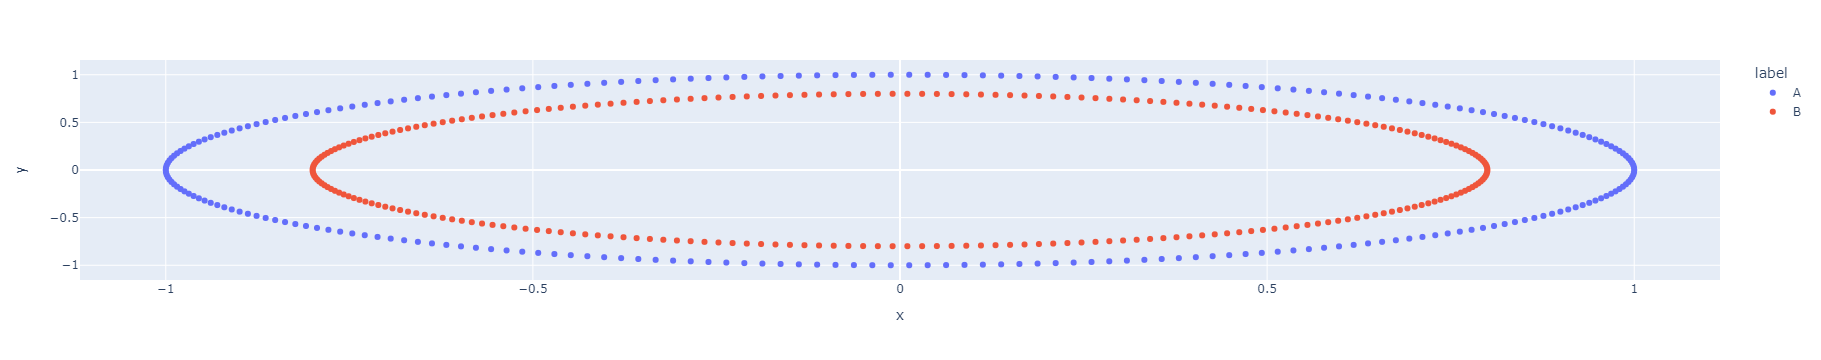

In [59]:
px.scatter(circles_df, x='x', y='y', color = 'label')

In [60]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…